In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
from scipy import stats

In [2]:
samples = ["FN1_14084_TAGCTT", "FN2_14085_GGCTAC", "FN3_14086_CTTGTA", "FN4_14087_GTGAAA", "FW1_14080_ATCACG", "FW2_14081_ACAGTG", "FW3_14082_GCCAAT", "FW4_14083_ACTTGA"]

In [3]:
def piekne_wykresy(samples, measure):
    df_mean = []
    for i in samples:
        read_file = pd.read_csv(f'Popoolation1\syn_nonsyn_sliding_{measure}\{i}.{measure}', sep='\t', header=None, names=['ref_contig', 
                                                                                                                        'window_pos', 
                                                                                                                        'codons_found_in_window',
                                                                                                                        'codon_used_in_analysis', 
                                                                                                                        'codons_contain_SNP', 
                                                                                                                        'raction_of_the_window', 
                                                                                                                        'sum+of_non_synonymous',
                                                                                                                        'sum_of_synonymous',
                                                                                                                        'number_of_nonsynonymous_SNPs',
                                                                                                                        'number_of_synonymous_SNPs',
                                                                                                                        f'{measure}_nonsyn',
                                                                                                                        f'{measure}_syn',])

        #change na to NaN
        read_file = read_file.replace('na', np.NaN)

        #droping na values
        read_file.dropna(inplace=True)

        read_file[f'{measure}_nonsyn'] = read_file[f'{measure}_nonsyn'].astype(float)
        read_file[f'{measure}_syn'] = read_file[f'{measure}_syn'].astype(float)

        #print(read_file.dtypes)

        mean = read_file[[f'{measure}_nonsyn', f'{measure}_syn']].mean()
        name = i.split('_')[0]
        df_mean.append([name, round(mean[0], 4), round(mean[1], 4)])

    df_mean = pd.DataFrame(df_mean, columns=['sample', f'{measure}_nonsyn', f'{measure}_syn'])
    df_mean['type'] = df_mean['sample'].str[:2]
    df_mean.set_index('sample', inplace=True)

    return df_mean

In [4]:
df_pi = piekne_wykresy(samples, 'pi')
df_theta = piekne_wykresy(samples, 'theta')

In [5]:
df_pi

,pi_nonsyn,pi_syn,type
sample,,,
FN1,0.0094,0.0424,FN
FN2,0.0098,0.0442,FN
FN3,0.0094,0.0425,FN
FN4,0.0103,0.0460,FN
FW1,0.0084,0.0386,FW
FW2,0.0092,0.0423,FW
FW3,0.0089,0.0411,FW
FW4,0.0085,0.0402,FW


In [6]:
df_theta

,theta_nonsyn,theta_syn,type
sample,,,
FN1,0.0090,0.0387,FN
FN2,0.0096,0.0413,FN
FN3,0.0091,0.0395,FN
FN4,0.0100,0.0424,FN
FW1,0.0080,0.0353,FW
FW2,0.0091,0.0400,FW
FW3,0.0085,0.0378,FW
FW4,0.0082,0.0373,FW


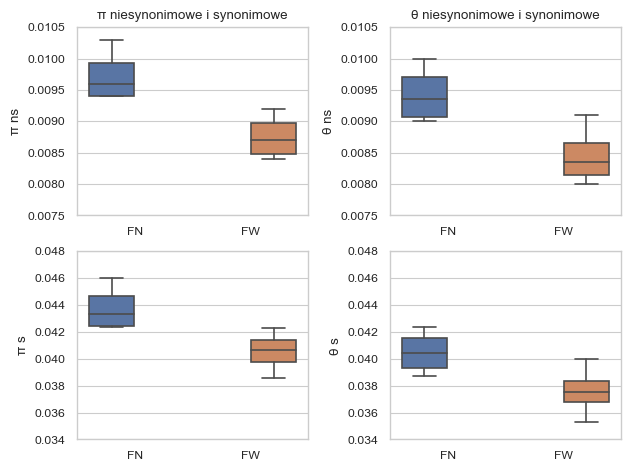

In [5]:
sns.set_theme(style="whitegrid")
sns.set_context("paper")

fig, ax= plt.subplots(nrows=2, ncols=2)

sns.boxplot(data=df_pi, x="type", y="pi_nonsyn", hue="type", ax=ax[0, 0])
ax[0, 0].set_title("π niesynonimowe i synonimowe")
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("π ns")
ax[0, 0].legend([],[], frameon=False)
ax[0, 0].set(ylim=(0.0075, 0.0105))
#ax[0, 0].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df_theta, x="type", y="theta_nonsyn", hue="type", ax=ax[0, 1])
ax[0, 1].set_title("θ niesynonimowe i synonimowe")
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("θ ns")
ax[0, 1].legend([],[], frameon=False)
ax[0, 1].set(ylim=(0.0075, 0.0105))
#ax[0, 1].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df_pi, x="type", y="pi_syn", hue="type", ax=ax[1, 0])
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("π s")
ax[1, 0].legend([],[], frameon=False)
ax[1, 0].set(ylim=(0.034, 0.048))
#ax[1, 0].set(ylim=(0.0075, 0.05))

sns.boxplot(data=df_theta, x="type", y="theta_syn", hue="type", ax=ax[1, 1])
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("θ s")
ax[1, 1].legend([],[], frameon=False)
ax[1, 1].set(ylim=(0.034, 0.048))
#ax[1, 1].set(ylim=(0.0075, 0.05))

fig.tight_layout()
plt.show()
fig.savefig(f'Popoolation1\syn_nonsyn_sliding_pi_theta.png', dpi=500)

In [6]:
df_theta

,theta_nonsyn,theta_syn,type
sample,,,
FN1,0.0090,0.0387,FN
FN2,0.0096,0.0413,FN
FN3,0.0091,0.0395,FN
FN4,0.0100,0.0424,FN
FW1,0.0080,0.0353,FW
FW2,0.0091,0.0400,FW
FW3,0.0085,0.0378,FW
FW4,0.0082,0.0373,FW


In [7]:
#testy statystyczne

#pi_nonsyn

grupy = df_pi.groupby('type')
FN = grupy.get_group('FN')['pi_nonsyn']
FW = grupy.get_group('FW')['pi_nonsyn']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)

Statystyka t: 3.4516428146760045
P-wartość: 0.013605614666635886


In [8]:
#testy statystyczne

#pi_syn

grupy = df_pi.groupby('type')
FN = grupy.get_group('FN')['pi_syn']
FW = grupy.get_group('FW')['pi_syn']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)

Statystyka t: 2.798402905860672
P-wartość: 0.031229608001795656


In [9]:
#testy statystyczne

#theta_nonsyn

grupy = df_theta.groupby('type')
FN = grupy.get_group('FN')['theta_nonsyn']
FW = grupy.get_group('FW')['theta_nonsyn']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)

Statystyka t: 2.9204403713510043
P-wartość: 0.026616045101597253


In [10]:
#testy statystyczne

#theta_nonsyn

grupy = df_theta.groupby('type')
FN = grupy.get_group('FN')['theta_syn']
FW = grupy.get_group('FW')['theta_syn']

statystyka, p_wartosc = stats.ttest_ind(FN, FW)

# Wyświetlenie wyników
print("Statystyka t:", statystyka)
print("P-wartość:", p_wartosc)

Statystyka t: 2.2457111362974382
P-wartość: 0.06582813696418355
